In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<Axes: ylabel='count'>

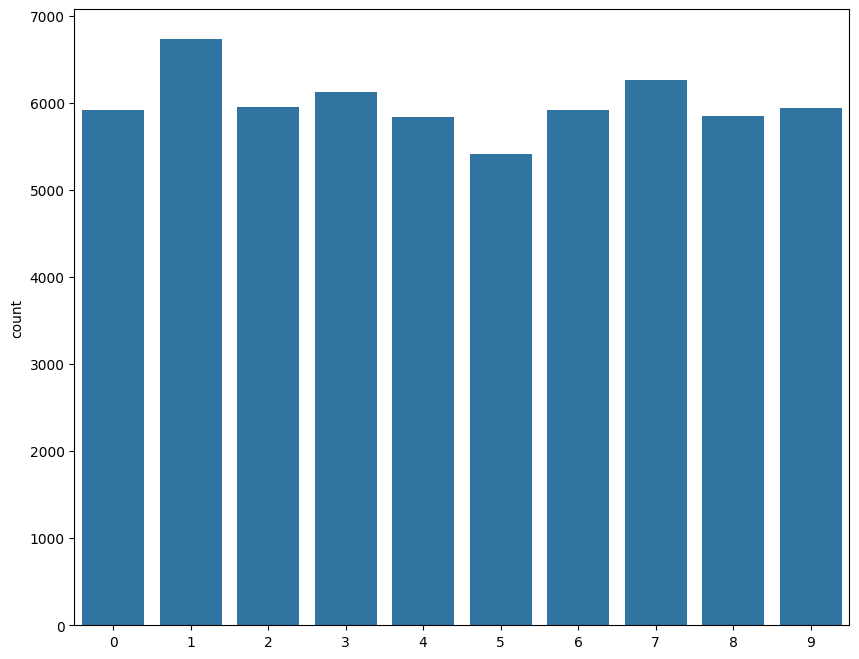

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

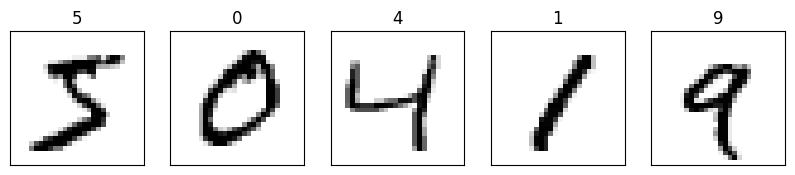

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 22, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,466 (2.26 MB)

 Trainable params: 591,018 (2.25 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 632s 373ms/step - accuracy: 0.8520 - loss: 0.5520 - val_accuracy: 0.9835 - val_loss: 0.0619
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 727s 399ms/step - accuracy: 0.9655 - loss: 0.1163 - val_accuracy: 0.9830 - val_loss: 0.0791
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 665s 394ms/step - accuracy: 0.9745 - loss: 0.0875 - val_accuracy: 0.9847 - val_loss: 0.0922
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 679s 393ms/step - accuracy: 0.9781 - loss: 0.0764 - val_accuracy: 0.9843 - val_loss: 0.0985
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 676s 389ms/step - accuracy: 0.9824 - loss: 0.0591 - val_accuracy: 0.9768 - val_loss: 0.1545
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 690s 394ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9862 - val_loss: 0.1043
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 665s 394ms/step - accuracy: 0.9835 - loss: 0.0548 - val_accuracy: 0.9860 - val_loss: 0.1158
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 676s 390ms/step - ac

In [14]:
model.save('MNproject.h5')

In [16]:
!pip install --upgrade tensorflow

from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

# Define a custom object to handle 'softmax_v2'

In [17]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9869 - loss: 4.3724
Test Loss 3.259183883666992
Test Accuracy 0.989799976348877


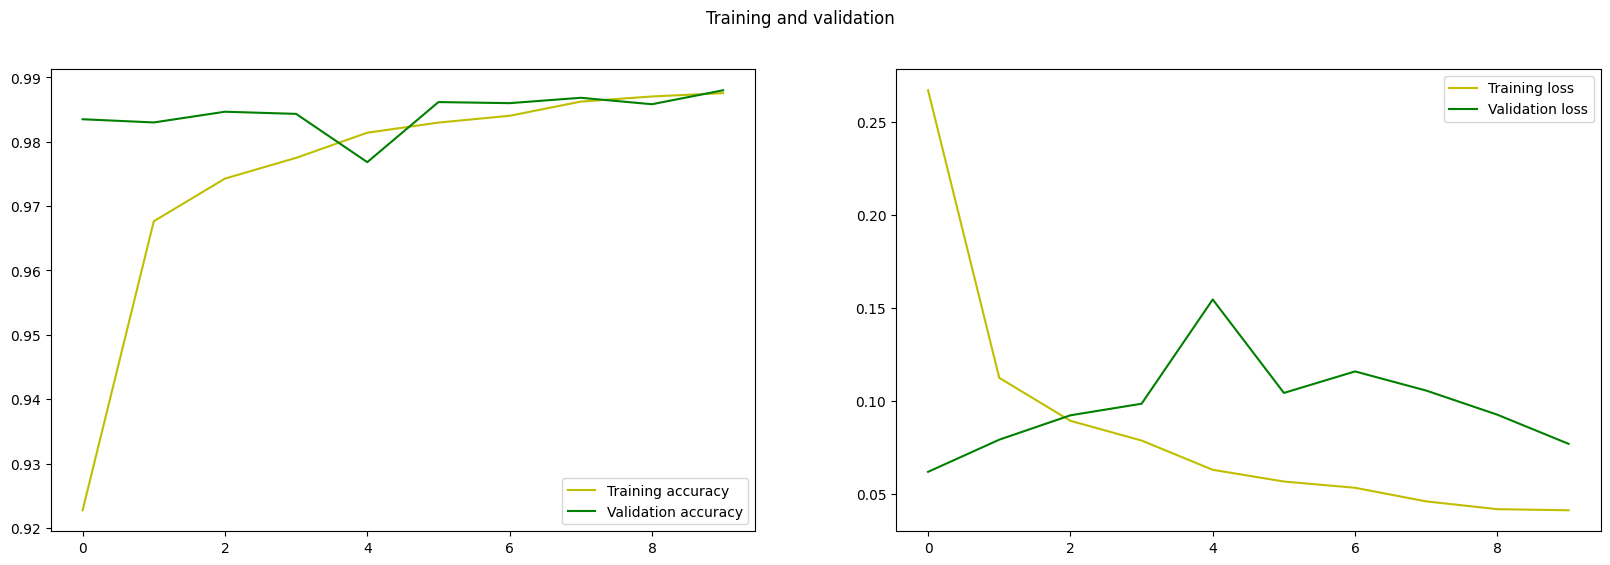

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [19]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    1,    0,    2,    1,    0,    0],
       [   0, 1129,    1,    1,    1,    1,    1,    1,    0,    0],
       [   1,    1, 1024,    1,    2,    0,    0,    3,    0,    0],
       [   0,    0,    4, 1003,    0,    1,    0,    1,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   3,    0,    0,    6,    0,  879,    2,    1,    1,    0],
       [   2,    3,    1,    0,    1,    3,  948,    0,    0,    0],
       [   0,    0,    5,    1,    1,    0,    0, 1021,    0,    0],
       [   4,    1,    3,    2,    4,    0,    1,    2,  954,    3],
       [   2,    0,    0,    0,   17,    1,    1,    4,    1,  983]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

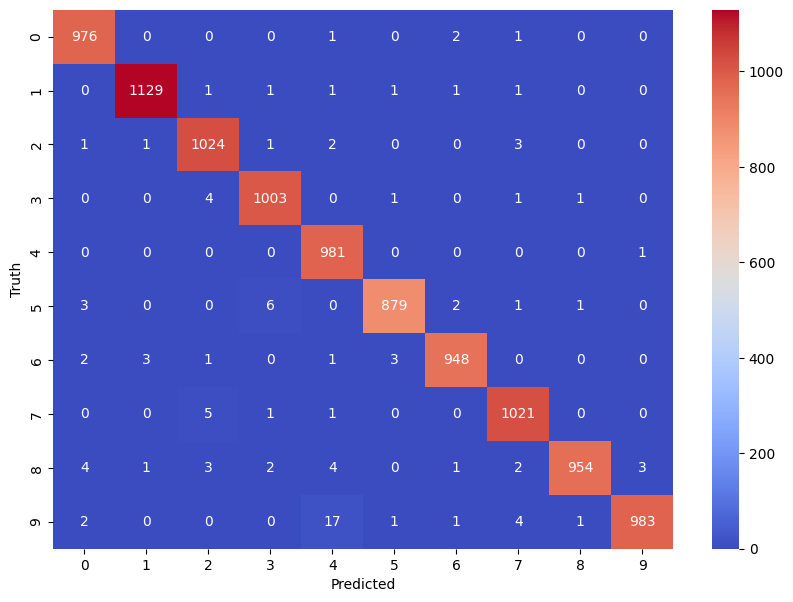

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step
Predicted Value:  9
Successful prediction


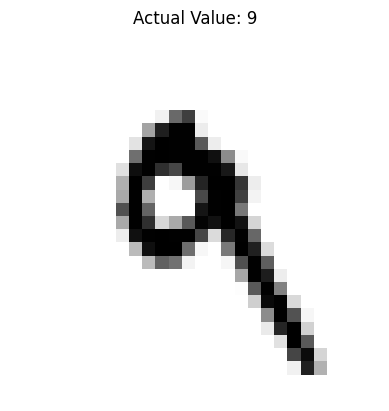

In [21]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step
Predicted Value:  2
Successful prediction


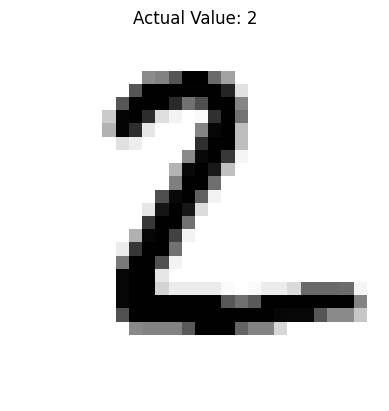

In [22]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')